<h3><center><b>Свирин Максим Сергеевич | Б19-501 | Нейронные сети | БДЗ | Вариант 13</b></center></h3> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import keras as k
from keras import backend as K
import tensorflow as tf
from keras.models import Sequential

Аппроксимация функции с помощью многослойной нейронной сети:

$$
f(x)=sin(x^3)
$$

на отрезке $[-3; 3]$. Объём выборки $300$, способ обучения: <i><b>mini-batch</b></i>, batch size: $20$

In [3]:
def f(x):
    return 3*np.sin(5*x) + x

def Gaussian_activation(x):
    return K.exp(-K.pow(x, 2))

def sin_activation(x):
    return K.sin(x)
    
def exp_activation(x):
    return K.cos(x)

def max_abs_error(true_dots, predicted_dots):
    s = []
    for x in predicted_dots:
        s.extend(x)
    return np.max(np.abs(true_dots - s))

def MSE(true_dots, predicted_dots):
    s = []
    for x in predicted_dots:
        s.extend(x)
    return np.square(np.subtract(true_dots, s)).mean()

def RMSE(true_dots, predicted_dots):
    return np.sqrt(MSE(true_dots, predicted_dots))

def g(x):
    return np.sin(x)

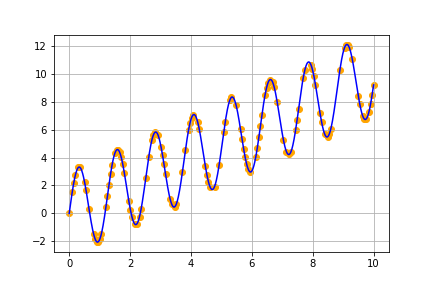

In [169]:
batch_size      = 20
boundaryLeft    = 0
boundaryRight   = 10
amountOfDots    = 200

amountOfEpochs  = 1000
amountOfNeurons = 100
learning_rate   = 0.01

init_kernel_val = 5
init_bias_val   = 2
train_percent       = 0.6
validation_percent  = 0.3
test_percent        = 1 - train_percent - validation_percent

train_amount        = int(amountOfDots*train_percent)
validation_amount   = int(amountOfDots*validation_percent)
test_amount         = int(amountOfDots*test_percent)

X = np.linspace(boundaryLeft, boundaryRight, num=amountOfDots)
Y = f(X)

np.random.shuffle(X)

X_train = X[:train_amount]
X_val   = X[train_amount:train_amount+validation_amount]
X_test  = X[train_amount+validation_amount:]

Y_train = f(X_train)
Y_val   = f(X_val)
Y_test  = f(X_test)

plot_x  = np.linspace(boundaryLeft, boundaryRight, 1000)
plot_y  = f(plot_x)

%matplotlib widget
plt.clf()
plt.plot(plot_x, plot_y, color='blue')

plt.scatter(X_train, Y_train, label="3sin(5x)+x", color="orange")

plt.grid()
# plt.legend()
plt.savefig('Graph_3sin(5x)+x.png', dpi=300)
plt.show()

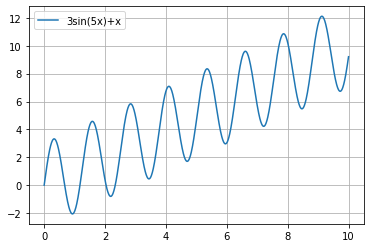

In [171]:
%matplotlib inline
plt.plot(plot_x, plot_y, label='3sin(5x)+x')
plt.grid()
plt.legend()
plt.savefig('3sin(5x)+x.png', dpi=300)
plt.show()

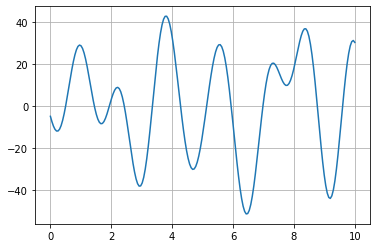

In [173]:
model = k.Sequential([
    tf.keras.layers.Input(
        shape=(1,)
    ),
    tf.keras.layers.Dense(
        amountOfNeurons,
        activation=sin_activation, 
        kernel_initializer=tf.keras.initializers.RandomUniform(minval=-init_kernel_val, maxval=init_kernel_val, seed=None), 
        bias_initializer  =tf.keras.initializers.RandomUniform(minval=-init_bias_val,   maxval=init_bias_val,   seed=None)
    ),
    tf.keras.layers.Dense(
        1, 
        kernel_initializer=tf.keras.initializers.RandomUniform(minval=-init_kernel_val, maxval=init_kernel_val, seed=None), 
        bias_initializer  =tf.keras.initializers.RandomUniform(minval=-init_bias_val,   maxval=init_bias_val,   seed=None)
    )
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
    loss='mse',
    metrics=['mse', tf.keras.metrics.RootMeanSquaredError()]
)

# model.summary()
X                         = np.array(sorted(X))
Y                         = f(X)
predicted_before_training = model.predict(X)

%matplotlib inline
plt.plot(X, predicted_before_training)
plt.grid()
plt.show()

In [163]:
model.save('my_model5.h5')

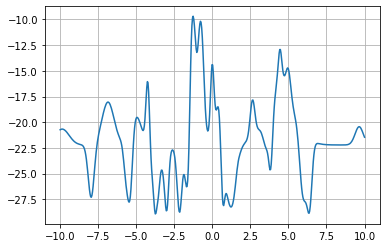

In [29]:
# X                         = np.array(sorted(X))
# Y                         = f(X)
# predicted_before_training = model.predict(X)

# %matplotlib inline
# plt.plot(X, predicted_before_training)
# plt.grid()
# plt.show()

In [140]:
def outputOfNeurons(values, title='После обучения'):
    outs = []
    for i in range(amountOfNeurons):
        tmp = []
        for x in X:
            val = g(x * values['KernelHidden'][0][0][i] + values['BiasHidden'][0][i])
            tmp.append(val)
        outs.append(tmp)

    for i, t in enumerate(outs):
        plt.plot(X, t, label=f'{i+1}', linewidth=0.25)

    fig = plt.gcf()
    fig.set_size_inches((15, 5))
    plt.title(f'{title}')
    plt.grid()
    plt.legend(fontsize=2)
    plt.savefig(f'Output_of_neurons_{title}_{amountOfEpochs=}_sin-activation_{learning_rate=}.png', dpi=300)
    plt.show()

In [174]:
values_before_training = {'KernelHidden': [], 'BiasHidden': []}
values_before_training['KernelHidden'].append(model.layers[0].get_weights()[0])
values_before_training['BiasHidden'  ].append(model.layers[0].get_weights()[1])

In [39]:
# K.set_value(model.optimizer.learning_rate, 0.1)
# fit_results = model.fit(
#     x=X_train, 
#     y=Y_train, 
#     epochs=amountOfEpochs, 
#     validation_data=(X_val, Y_val), 
#     batch_size=batch_size
# )

Epoch 1/1000
9/9 [==============================] - 0s 17ms/step - loss: 1674.9280 - mse: 1674.9280 - root_mean_squared_error: 40.9259 - val_loss: 1250.4613 - val_mse: 1250.4613 - val_root_mean_squared_error: 35.3619
Epoch 2/1000
9/9 [==============================] - 0s 4ms/step - loss: 1078.4838 - mse: 1078.4838 - root_mean_squared_error: 32.8403 - val_loss: 729.5306 - val_mse: 729.5306 - val_root_mean_squared_error: 27.0098
Epoch 3/1000
9/9 [==============================] - 0s 4ms/step - loss: 725.1116 - mse: 725.1116 - root_mean_squared_error: 26.9279 - val_loss: 730.0720 - val_mse: 730.0720 - val_root_mean_squared_error: 27.0198
Epoch 4/1000
9/9 [==============================] - 0s 4ms/step - loss: 769.3387 - mse: 769.3387 - root_mean_squared_error: 27.7370 - val_loss: 633.8546 - val_mse: 633.8546 - val_root_mean_squared_error: 25.1765
Epoch 5/1000
9/9 [==============================] - 0s 4ms/step - loss: 608.8083 - mse: 608.8083 - root_mean_squared_error: 24.6740 - val_loss: 2

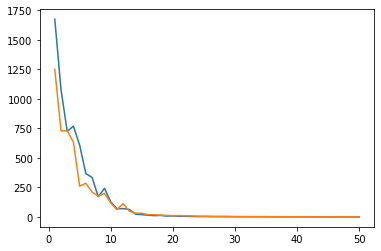

In [46]:
# print('\nhistory dict:', fit_results.history)
# print(model.evaluate(x=X_val, y=Y_val, batch_size=20))
# print(model.layers[0].get_weights())
loss_train = fit_results.history['loss']
loss_val = fit_results.history['val_loss']

plt.plot(np.arange(1, 51), loss_train[:50])
plt.plot(np.arange(1, 51), loss_val[:50])

In [175]:
errors = {
    'Train':[], 
    'Validation':[], 
    'Test': [], 
    'Epoch':[]
}
values = {
    'KernelHidden': [], 
    'BiasHidden': [], 
    'ValueOut': [], 
    'Epoch': []
}

# K.set_value(model.optimizer.learning_rate, 0.2)
for i in range(amountOfEpochs):
    historyOfModel = model.fit(
        x              =X_train, 
        y              =Y_train, 
        epochs         =1, 
        validation_data=(X_val, Y_val), 
        batch_size     =batch_size
    )
    
    values['KernelHidden'].append(model.layers[0].get_weights()[0])
    values['BiasHidden'  ].append(model.layers[0].get_weights()[1])
    values['ValueOut'    ].append(model.layers[1].get_weights()[0])
    values['Epoch'       ].append(i+1)
    
    errors['Train'     ].append(model.evaluate(X_train,  Y_train, batch_size=batch_size, verbose=0)[0])
    errors['Validation'].append(model.evaluate(X_val,    Y_val,   batch_size=batch_size, verbose=0)[0])
    errors['Test'      ].append(model.evaluate(X_test,   Y_test,  batch_size=batch_size, verbose=0)[0])
    errors['Epoch'     ].append(i+1)

6/6 [==============================] - 0s 8ms/step - loss: 0.0014 - mse: 0.0014 - root_mean_squared_error: 0.0378 - val_loss: 0.0042 - val_mse: 0.0042 - val_root_mean_squared_error: 0.0647


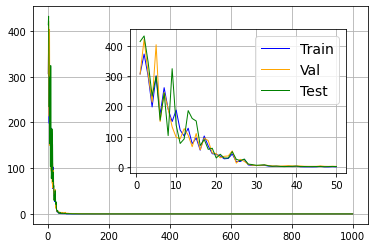

In [176]:
plt.plot(errors['Epoch'], errors['Train'],      linewidth=1, color="blue")
plt.plot(errors['Epoch'], errors['Validation'], linewidth=1, color="orange")
plt.plot(errors['Epoch'], errors['Test'],       linewidth=1, color="green")
plt.grid()

stop_epoch = 50

a = plt.axes([0.35, 0.3, .5, .5], facecolor='white')
plt.plot(errors['Epoch'][:stop_epoch], errors['Train'][:stop_epoch],      linewidth=1, color="blue",   label='Train')
plt.plot(errors['Epoch'][:stop_epoch], errors['Validation'][:stop_epoch], linewidth=1, color="orange", label='Val')
plt.plot(errors['Epoch'][:stop_epoch], errors['Test'][:stop_epoch],       linewidth=1, color="green",  label='Test')

# plt.scatter(
#     [errors['Epoch'][2], errors['Epoch'][7]], 
#     [errors['Validation'][2], errors['Validation'][7]], 
#     color='black', label='Retraining points'
# )
plt.legend(fontsize=14)
plt.grid()
# plt.title('Более крупный масштаб')

plt.savefig(f'Loss_graph_{amountOfEpochs=}_sin-activation_{learning_rate=}.png', dpi=300)

plt.show()

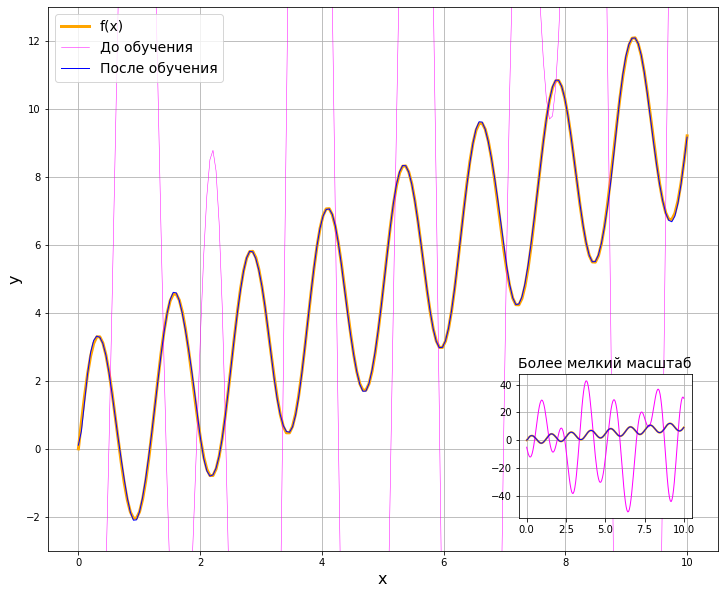

In [177]:
predicted_train      = model.predict(X_train)
predicted_validation = model.predict(X_val)
predicted_test       = model.predict(X_test)

X         = np.array(sorted(X))
Y         = f(X)
predicted = model.predict(X)

# Отрисовка работы обученной сети на всех данных (график функции)
%matplotlib inline

fig = plt.gcf()
fig.set_size_inches((12, 10))

plt.plot(X, Y, label='f(x)', color='orange', linewidth=3)
plt.plot(X, predicted_before_training, label='До обучения', color='magenta', linewidth=0.5)
plt.plot(X, predicted, label='После обучения', color='blue', linewidth=1)
# plt.scatter(X_train, Y_train, label="Train dots", color="black", s=10)

plt.ylim([-3., 13])
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.legend(loc='upper left', fontsize=14)
plt.grid()

a = plt.axes([0.67, 0.17, .2, .2], facecolor='white')
plt.plot(X, Y, color='orange', linewidth=2)
plt.plot(X, predicted_before_training, color='magenta', linewidth=1)
plt.plot(X, predicted,color='blue', linewidth=1)
plt.title('Более мелкий масштаб', fontsize=14)

plt.grid()
plt.savefig(f'{amountOfEpochs}; amount of neurons={amountOfNeurons}; learning rate={learning_rate}; activation func = sin.png', dpi=300)
plt.show()

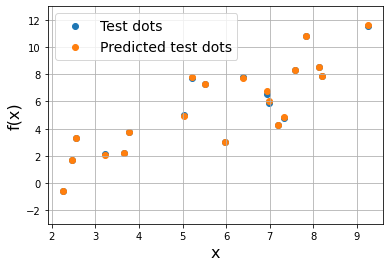

In [178]:
plt.scatter(X_test, Y_test, label='Test dots'),
plt.scatter(X_test, predicted_test, label='Predicted test dots')

plt.ylim([-3, 13])
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.grid()
plt.legend(loc='upper left', fontsize=14)
plt.show()

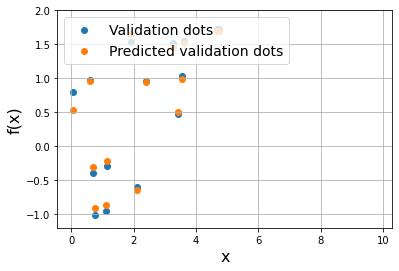

In [179]:
plt.scatter(X_val, Y_val, label='Validation dots'),
plt.scatter(X_val, predicted_validation, label='Predicted validation dots')

plt.ylim([-1.2, 2])
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.grid()
plt.legend(loc='upper left', fontsize=14)
plt.show()

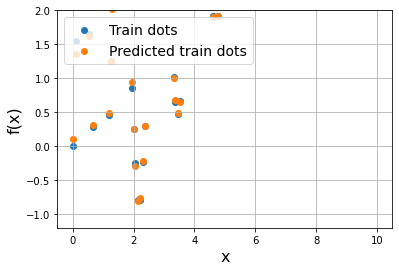

In [180]:
plt.scatter(X_train, Y_train, label='Train dots'),
plt.scatter(X_train, predicted_train, label='Predicted train dots')

plt.ylim([-1.2, 2])
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.grid()
plt.legend(loc='upper left', fontsize=14)
plt.show()

In [184]:
print(f'Max abs error in train dots:      {max_abs_error(Y_train, predicted_train)}'     )
print(f'Max abs error in validation dots: {max_abs_error(Y_val,   predicted_validation)}')
print(f'Max abs error in test dots:       {max_abs_error(Y_test,  predicted_test)}'      )

Max abs error in train dots:      0.19125568107613167
Max abs error in validation dots: 0.2648766251366076
Max abs error in test dots:       0.14827444778977217


In [185]:
print(f'MSE in train dots:      {MSE(Y_train, predicted_train)}'     )
print(f'MSE in validation dots: {MSE(Y_val,   predicted_validation)}')
print(f'MSE in test dots:       {MSE(Y_test,  predicted_test)}'      )

MSE in train dots:      0.001375182770590233
MSE in validation dots: 0.004188252248789715
MSE in test dots:       0.0028616388686765115


In [186]:
print(f'RMSE in train dots:      {RMSE(Y_train, predicted_train)}'     )
print(f'RMSE in validation dots: {RMSE(Y_val,   predicted_validation)}')
print(f'RMSE in test dots:       {RMSE(Y_test,  predicted_test)}'      )

RMSE in train dots:      0.037083456831722594
RMSE in validation dots: 0.06471670764794603
RMSE in test dots:       0.053494288187399146


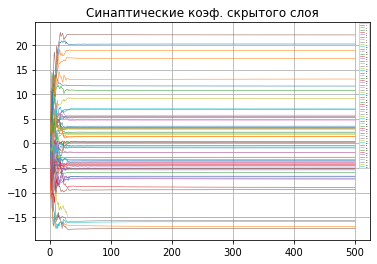

In [125]:
for i in range(amountOfNeurons):
    plt.plot(values['Epoch'], [x[0][i] for x in values['KernelHidden']], label=f'{i+1}', linewidth=0.5)

plt.title("Синаптические коэф. скрытого слоя")
plt.grid()
plt.legend(fontsize=2)
plt.savefig(f'Kernel_coefficients_in_hidden_layer_{amountOfEpochs=}_sin-activation_{learning_rate=}.png', dpi=300)
plt.show()

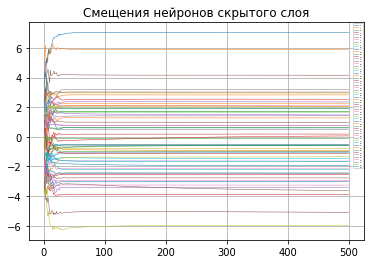

In [126]:
for i in range(amountOfNeurons):
    plt.plot(values['Epoch'], [x[i] for x in values['BiasHidden']], label=f'{i+1}', linewidth=0.5)

plt.title("Смещения нейронов скрытого слоя")
plt.grid()
plt.legend(fontsize=2)
plt.savefig(f'Bias_of_hidden_layer_{amountOfEpochs=}_sin-activation_{learning_rate=}.png', dpi=300)
plt.show()

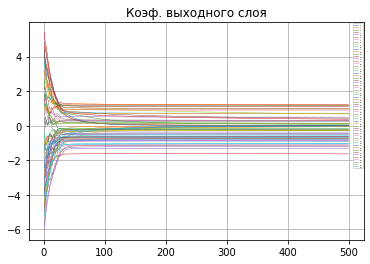

In [127]:
for i in range(amountOfNeurons):
    plt.plot(values['Epoch'], [x[i][0] for x in values['ValueOut']], label=f'{i+1}', linewidth=0.5)

plt.title("Коэф. выходного слоя")
plt.grid()
plt.legend(fontsize=2)
plt.savefig(f'Output_of_hidden_layer_{amountOfEpochs=}_sin-activation_{learning_rate=}.png', dpi=300)
plt.show()

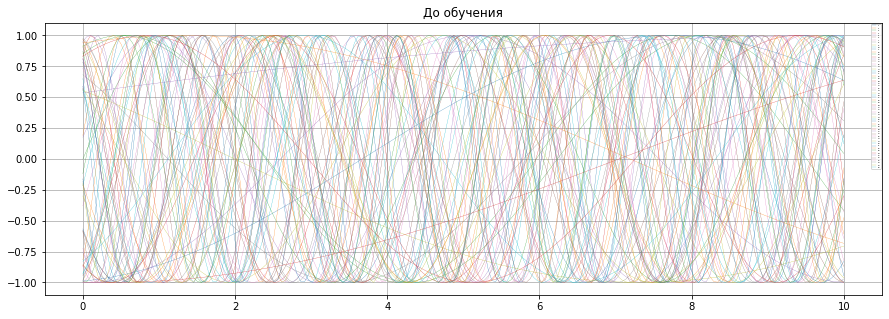

In [131]:
outputOfNeurons(values_before_training, 'До обучения')

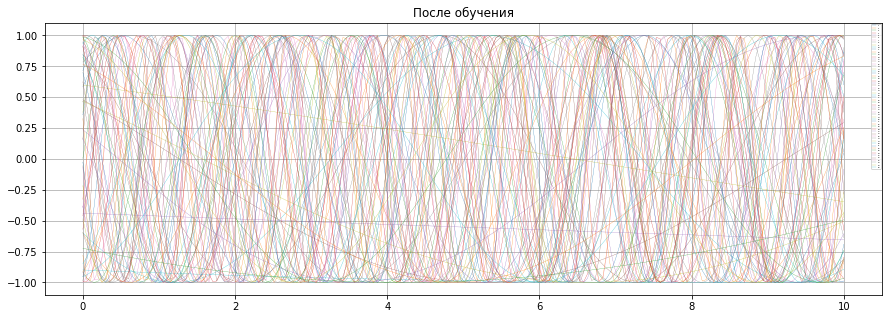

In [132]:
outputOfNeurons(values, 'После обучения')

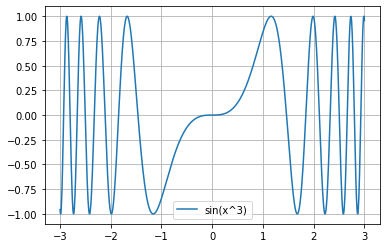

In [37]:
plt.plot(plot_x, plot_y, label="sin(x^3)")
plt.grid()
plt.legend()
plt.savefig('Graph_sin(x^3).png', dpi=300)

In [105]:
with open('Coefficients.txt', 'a') as file:
    coeffs = {'hidden': [], 'hidden_bias': []}
    coeffs['hidden'].append(model.layers[0].get_weights()[0])
    coeffs['hidden_bias'].append(model.layers[0].get_weights()[1])
    file.write(f'{amountOfNeurons=}, activation=K.sin(x)')
    file.write(str(coeffs))
    

{'hidden': [array([[ 6.5616093e+00, -2.3730710e+00,  1.9512398e+01, -1.5922019e+00,
         7.4190211e+00, -7.4509616e+00, -2.8040390e+00,  7.8797060e-01,
        -8.6713266e+00, -1.8463070e+01, -1.6198725e+01, -1.9521435e+01,
        -3.5940106e+00, -3.0078118e+00,  5.4147458e-01,  7.0586562e+00,
         3.4748385e+00, -8.6673307e+00, -1.7829815e+01,  3.6144383e+00,
        -6.7392149e+00, -1.1456987e+01,  6.7758341e+00,  5.9189939e+00,
        -5.1272195e-02,  2.0522654e+01,  4.6550183e+00, -9.3431644e+00,
        -5.4282026e+00, -1.4754630e+01, -7.3408663e-01, -1.7615623e+01,
        -1.4638325e+01, -5.0361967e+00,  8.6516075e+00,  9.7201433e+00,
        -6.6045480e+00,  7.8987722e+00,  1.6722462e+01, -5.6979716e-01,
         1.4459765e+01,  4.1002389e-03, -6.9211917e+00,  1.3315291e+00,
        -1.5956348e+01, -8.9173756e+00,  1.6129431e+00,  1.3274330e+00,
        -1.3022070e+00, -1.8910343e+01, -2.8268988e+00,  1.4642820e+01,
        -8.0522270e+00,  5.3607464e+00, -1.8236700e+